In [1]:
%matplotlib inline

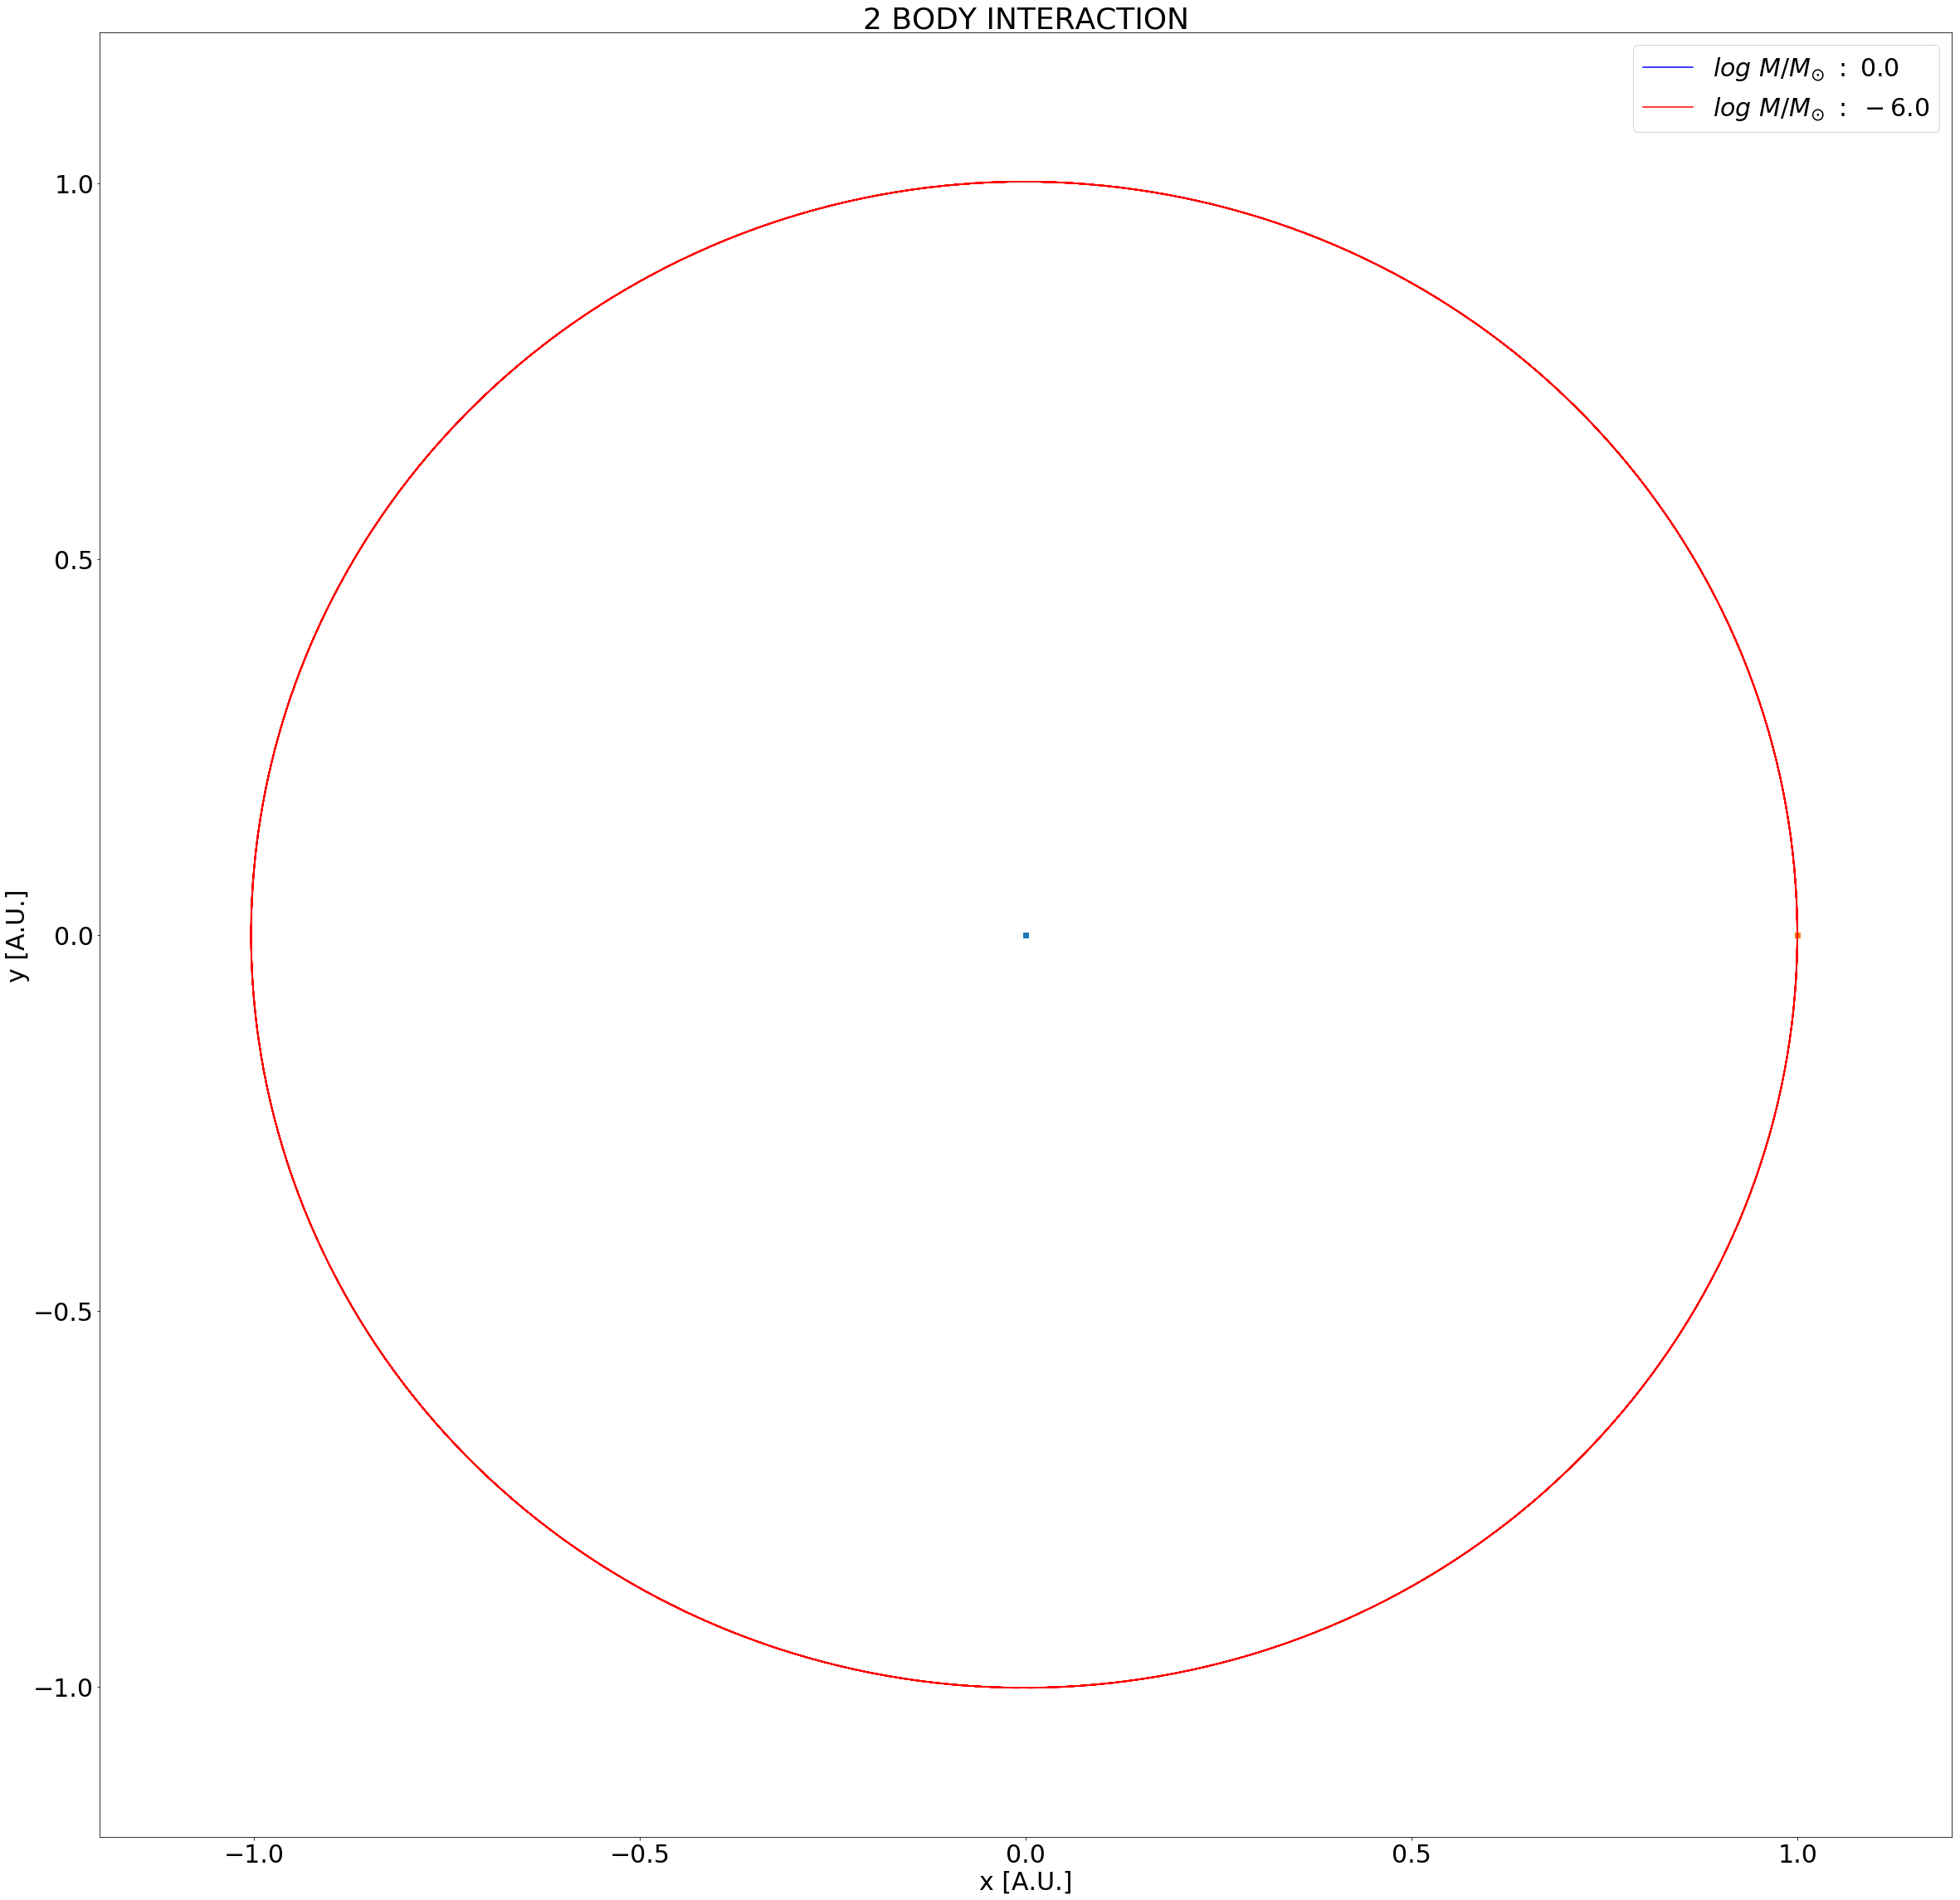

In [2]:
# %load course_materials/ODE.py
#python>=3.7.2
#this program calculates and plots the orbits of 2 point sources interacting only gravitationally, integrating the equation of motion with the scipy package "odeint"


#modules needed
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import odeint


#define the differential system d(r_i,v_i)/dt
def dAdt(data,t):
	
	d12=np.linalg.norm([data[1]-data[0],data[2]-data[3]])
	
	datadot=np.zeros(len(data)) 
	
	datadot[0]=data[4]
	datadot[1]=data[6]

	datadot[2]=data[5]
	datadot[3]=data[7]

	datadot[4]=-G*m[1]*(data[0]-data[1])/((d12+eps)**3) 
	datadot[5]=-G*m[1]*(data[2]-data[3])/((d12+eps)**3) 

	datadot[6]=-G*m[0]*(data[1]-data[0])/((d12+eps)**3) 
	datadot[7]=-G*m[0]*(data[3]-data[2])/((d12+eps)**3) 
		
		
	
	return datadot 





#changing units of measurement (A.U.=1, year=1, Msun=1)
Kg=1./(1.988E+30)
m=1./(1.496E11)
s=1./(3.153E+07)
G=(6.674E-11)*(m**3)*(Kg**-1)*(s**-2)



#generate random initial positions and velocities for the 2 bodies
x1=1 
y1=0 

x2=0 
y2=0 

vx1= 0 
vy1= 0 



vx2= 2*np.pi #np.random.uniform(-2.,2.,1)[0]*3.14
vy2= 0 #np.random.uniform(-2.,2.,1)[0]*3.14



#masses (in solar unit)
m=[1e-6,1.]


#store all the data in a single list
data0=[x1,x2,y1,y2,vx1,vx2,vy1,vy2] #[x],[y],[vx],[vy]

#softening parameter (to avoid divergent forces)
eps=1.E-10 

#time vector
t=np.linspace(0,10,1000)  

#solution from odeint as a datacube
sol=odeint(dAdt,data0,t)  

#set general fontsize
plt.rc('font',size=30)

#create the figure
fig=plt.figure(1,figsize=(40,40))
#add axis
ax=fig.add_subplot(111)

#plot initial positions 
ax.scatter(sol[0,1],sol[0,3],marker='s',s=40)
ax.scatter(sol[0,0],sol[0,2],marker='s',s=40)

#plot the orbits
ax.plot(sol[:,1],sol[:,3],color='blue',label=r'$log\ M/M_{\odot}\ :\ %.1f\ $'%(math.log10(m[1])))
ax.plot(sol[:,0],sol[:,2],color='red',label=r'$log\ M/M_{\odot}\ :\ %.1f\ $'%(math.log10(m[0])))
plt.legend()

ax.set_xlabel('x [A.U.]')
ax.set_ylabel('y [A.U.]')
ax.set_title('2 BODY INTERACTION')
#save the figure
#plt.savefig('2body.png')

plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
#plt.xlim(-2e-4, 2e-4)
#plt.ylim(-2e-4, 2e-4)
#show on screen
plt.show()